In [4]:
import pandas as pd
from IPython.display import clear_output

file = pd.ExcelFile("Market.xlsx")
print("Sheets available in the excel\n",file.sheet_names)


Sheets available in the excel
 ['stats', '2018_Market', '2019_Market', '2020_Market', '2021_Market']


In [4]:
#cols = [0, 2, 7]
#sheet = file.parse("stats", usecols=cols)#assigning specific sheet name & cloumn no. to access 

sheet = file.parse("stats")
print("type of sheet: ",type(sheet))
print("Content in the sheet:\n",sheet)


type of sheet:  <class 'pandas.core.frame.DataFrame'>
Content in the sheet:
     NAV_as_on     Amt  NAVperUnit  UnitsPurchased  Balance_Units  \
0  2018-05-30  2000.0     47.1800       42.390000       0.000000   
1  2018-06-05  2000.0     47.1799       42.391000      42.391000   
2  2018-07-05  2000.0     45.9715       43.505000      85.896000   
3  2018-08-06  2000.0     48.5624       41.184000     127.080000   
4  2018-09-05  2000.0     48.4393       41.289000     168.369000   
5  2018-10-05  2000.0     42.9807       46.533000     214.902000   
6  2018-11-05  2000.0     44.1242       45.327000     260.229000   
7  2018-12-05  2000.0     45.0463       44.399000     304.628000   
8  2019-01-07  2000.0     45.6408       43.820000     348.448000   
9  2019-02-05  2000.0     45.1378       44.309000     392.757000   
10 2019-03-05  2000.0     46.1033       43.381000     436.138000   
11 2019-04-05  2000.0     48.7198       41.052000     477.190000   
12 2019-05-06  2000.0     48.3019      

#### There is no major difference between ExcelFile and read_excel funtion,
https://stackoverflow.com/questions/26474693/excelfile-vs-read-excel-in-pandas

##### Accessing specific columns from the excel

In [5]:
cols = [0, 2, 3, 4, 5, 6, 7]

df = pd.read_excel("Market.xlsx", usecols=cols)
    print("'df' is of type: ", type(df))
print("\nPrinting specific columns: \n",df)



'df' is of type:  <class 'pandas.core.frame.DataFrame'>

Printing specific columns: 
     NAV_as_on  NAVperUnit  UnitsPurchased  Balance_Units  Investment_Value  \
0  2018-05-30     47.1800       42.390000       0.000000            2000.0   
1  2018-06-05     47.1799       42.391000      42.391000            2000.0   
2  2018-07-05     45.9715       43.505000      85.896000            4000.0   
3  2018-08-06     48.5624       41.184000     127.080000            6000.0   
4  2018-09-05     48.4393       41.289000     168.369000            8000.0   
5  2018-10-05     42.9807       46.533000     214.902000           10000.0   
6  2018-11-05     44.1242       45.327000     260.229000           12000.0   
7  2018-12-05     45.0463       44.399000     304.628000           14000.0   
8  2019-01-07     45.6408       43.820000     348.448000           16000.0   
9  2019-02-05     45.1378       44.309000     392.757000           18000.0   
10 2019-03-05     46.1033       43.381000     436.138000

##### Code for pulling date, Units puschased when growth rate was > 100 

In [6]:
#below 2 lines of code will display selected columns from the excel
cols = [0, 2, 7]
df = pd.read_excel("Market.xlsx", usecols=cols)

print("Data showing when Growth rate is above 100%:\n",df.loc[df["GrowthRate"] > 100])

print("\n Avera rate of NAV:",df.NAVperUnit.mean())

print("\n Average of growth rate:",df.GrowthRate.mean())

Data showing when Growth rate is above 100%:
     NAV_as_on  NAVperUnit  GrowthRate
3  2018-08-06     48.5624  102.855167
4  2018-09-05     48.4393  101.946000
10 2019-03-05     46.1033  100.537000
11 2019-04-05     48.7198  105.674182
12 2019-05-06     48.3019  104.371542
13 2019-06-06     50.1464  107.714269
14 2019-07-10     49.9317  106.735071
16 2019-09-05     46.8816  100.240188
17 2019-10-07     48.3604  103.201941
18 2019-11-05     50.5742  107.485917
19 2019-12-05     50.4662  106.874395
20 2020-01-06     50.5446  106.688400
21 2020-02-05     52.1757  109.648857
22 2020-03-05     49.3596  103.561159
28 2020-09-07     47.1178  101.387275
29 2020-10-05     47.4611  102.053462
30 2020-11-05     50.2520  107.785332
31 2020-12-07     56.4622  120.424746
32 2021-01-05     59.3334  125.718938
33 2021-02-08     63.8593  134.238718
34 2021-03-08     64.3436  134.219879
35 2021-04-06     62.5797  129.667881
36 2021-05-05     63.3015  130.297838

 Avera rate of NAV: 49.271097297297295

 

In [5]:
#### Graphical representation of market observation
#### ploting graph for growth 

#### NOTE: Below code extract only month-year format from actual date 'NAV_as_on'


In [6]:
stats1 = file.parse("stats")
#stats1 is a DataFrame which has excel sheet 'stats' all the data.
print("Data type of stats1 is: ",type(stats1))
#print(stats1)

#NOTE: Below code extract only month-year format from actual date 'NAV_as_on'
# 'MnthYr' is a new column in the Dataframe and will be appended in the end.

stats1['MnthYr'] = pd.to_datetime(stats1['NAV_as_on']).dt.strftime('%m-%Y')
#print(stats1)

var = stats1.loc[stats1["GrowthRate"] > 100]["MnthYr"]
var2 = stats1.loc[stats1["GrowthRate"] > 100]["GrowthRate"]
print(var, var2)

Data type of stats1 is:  <class 'pandas.core.frame.DataFrame'>
3     08-2018
4     09-2018
10    03-2019
11    04-2019
12    05-2019
13    06-2019
14    07-2019
16    09-2019
17    10-2019
18    11-2019
19    12-2019
20    01-2020
21    02-2020
22    03-2020
28    09-2020
29    10-2020
30    11-2020
31    12-2020
32    01-2021
33    02-2021
34    03-2021
35    04-2021
36    05-2021
Name: MnthYr, dtype: object 3     102.855167
4     101.946000
10    100.537000
11    105.674182
12    104.371542
13    107.714269
14    106.735071
16    100.240188
17    103.201941
18    107.485917
19    106.874395
20    106.688400
21    109.648857
22    103.561159
28    101.387275
29    102.053462
30    107.785332
31    120.424746
32    125.718938
33    134.238718
34    134.219879
35    129.667881
36    130.297838
Name: GrowthRate, dtype: float64


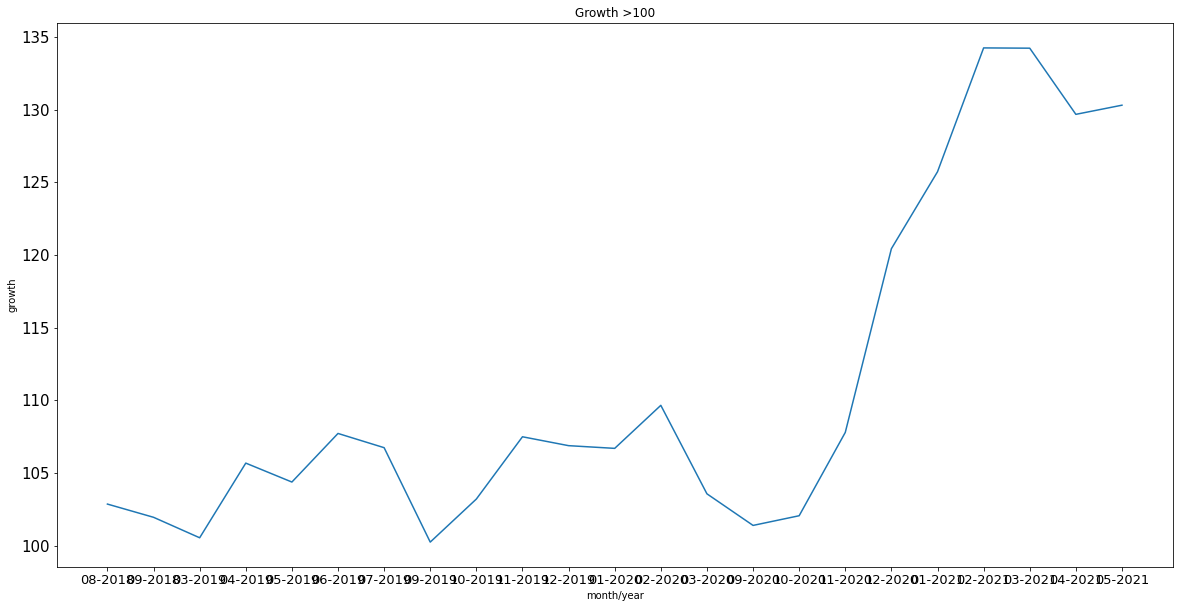

In [9]:
#### Below code to draw graph for the  growth rate above 100

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,10 #this line of code is used to set the graph size

plt.xticks(fontsize=13 )#Used to set font size of the x-axis 
plt.yticks(fontsize=15 )#Used to set font size of the y-axis 

plt.xlabel('month/year')#Will display month-year on x-axis
plt.ylabel('growth')#Will display growth rate on y-axis
plt.title('Growth >100' )

plt.plot(var,var2)
plt.show() #This graph show when the market growth was > 100%

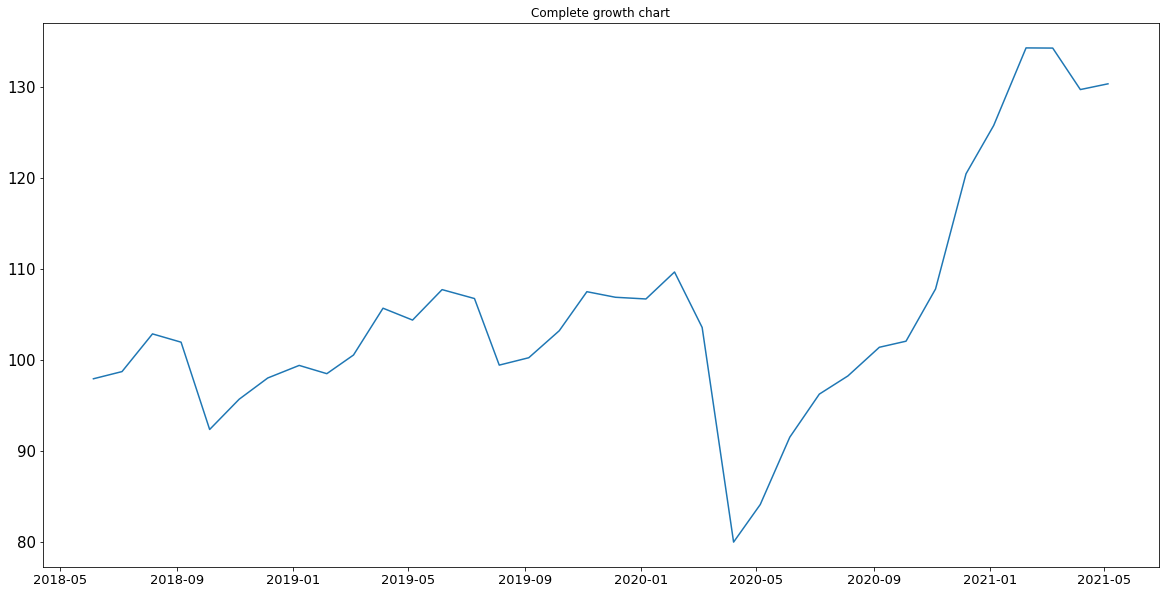

In [7]:
#### Below code to draw graph for the complete growth chart

stats1 = file.parse("stats")
#stats1['Yr'] = pd.to_datetime(stats1['NAV_as_on']).dt.strftime('%Y')

#var = stats1.loc[stats1['GrowthRate']]['yr']
#var2 = stats1.loc[stats1['GrowthRate']]['GrowthRate']

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=20,10

plt.xticks(fontsize=13)
plt.yticks(fontsize=15)

x1 = stats1['NAV_as_on']
y1 = stats1['GrowthRate']

#print(x1, x2)

plt.title('Complete growth chart')
plt.plot(x1,y1)
plt.show()

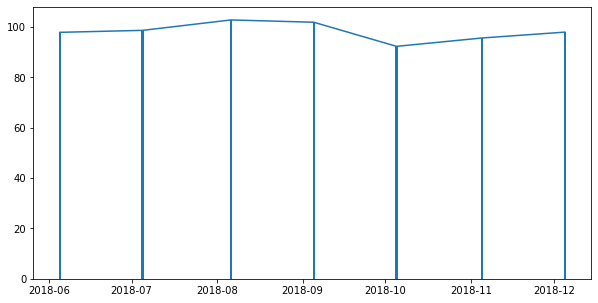

In [8]:
#### Below code is used to display growth rate for the year 2018 
#### from 'stats' and '2018_market' sheets

stats1 = file.parse("2018_Market")
#print(stats1)

stats1 = pd.DataFrame(stats1)
start_date = '2018-01-01'
end_date ='2018-12-31'

mask = (stats1['NAV_as_on'] > start_date) & (stats1['NAV_as_on'] < end_date)

stats1 = stats1.loc[mask]
#print(stats1)

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=10,5


x1 = stats1['NAV_as_on']
y1 = stats1['GrowthRate']

plt.plot(x1,y1)
plt.bar(x1,y1)
plt.show()


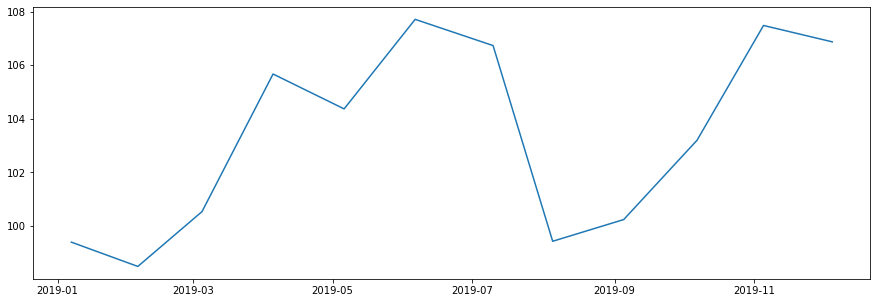

In [11]:
#### Below code is used to display growth rate for the year 2018 
#### from 'stats' and '2019_market' sheets

stats2 = file.parse("2019_Market")
#print(stats2)

#stats2 = pd.DataFrame(stats2)
#start_date = '2019-01-01'
#end_date ='2019-12-31'

#mask = (stats2['NAV_as_on'] > start_date) & (stats1['NAV_as_on'] < end_date)

#stats2 = stats2.loc[mask]
#print(stats2)

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=15,5


x2 = stats2['NAV_as_on']
y2 = stats2['GrowthRate']

plt.plot(x2,y2)
#plt.bar(x2,y2)
plt.show()


### Below code is used to display growth rate from the year 2018-to-21 years sheet-wise 

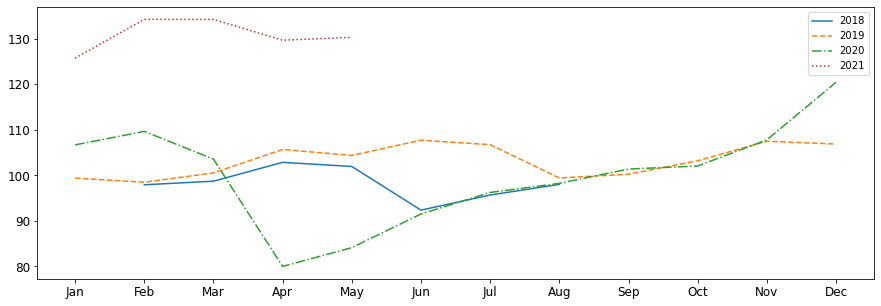

In [12]:


stats1 = file.parse("2018_Market")
stats2 = file.parse("2019_Market")
stats3 = file.parse("2020_Market")
stats4 = file.parse("2021_Market")

import matplotlib.pyplot as plt

#plt.rcParams["figure.figsize"]=15,15 #this code  for customizing the size of the graph 

plt.xticks(fontsize=12 )#Used to set font size of the x-axis 
plt.yticks(fontsize=12 )#Used to set font size of the y-axis 


#x1 = ["May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y1 = stats1['GrowthRate']

#x2 = stats2['NAV_as_on']
x2 = ["Jan","Feb","Mar","Apr","May", "Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y2 = stats2['GrowthRate']


#x3 = stats3['NAV_as_on']
y3 = stats3['GrowthRate']

#x4 = stats4['NAV_as_on']
y4 = stats4['GrowthRate']


plt.plot(y1, label='2018', linestyle='-')  
plt.plot(x2,y2,label='2019', linestyle='--')
plt.plot(x2,y3,label='2020', linestyle='-.')
plt.plot(y4,label='2021', linestyle=':')
plt.legend()#Display the color line labels classifications
plt.show()

#not able to plot for the sheet "2018_Market" coz 
#x-axis , y-axis should have same data point as we have it for "2019-20_Market", 
#instead we can only plot y-axis of "2018-Market" only